In [1]:
import scanpy as sc
import seaborn as sns
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# 设置参数
mpl.rcParams["pdf.fonttype"] = 42  # 保留字体
sc.settings.verbosity = 4  # 输出细节
sc._settings.ScanpyConfig.n_jobs = -1  # 使用所有核心
sc.settings.set_figure_params(
    dpi=80,
    dpi_save=600,
    facecolor="white",
    frameon=False,  # remove frame
)

8.聚类

- 8.1 读取去批次后的数据
- 8.2 降维
- 8.3 邻域图
- 8.4 莱顿聚类
- 8.4.1 不同分辨率的莱顿聚类
- 8.4.2 莱顿聚类可视化
- 8.4.3 选择想要的分辨率，刚好注释到想要的细胞类型？
- 8.4.4 page(可选)
- 8.5 保存

---

- 一般归一化后是特征选择，降维，聚类
- 去批次相当于完全完成了特征选择，降维
- 去批次的聚类只是为了可视化批次效应，比较粗糙
- 所以还是要专门精细的聚类


In [3]:
## 8.1 读取去批次后的数据
adata = sc.read("./anndata_batch_scvi.h5ad")

/home/fanxi/miniconda3/envs/lang/lib/python3.11/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [4]:
## 8.2 降维
## 见7.4

In [5]:
adata

AnnData object with n_obs × n_vars = 172066 × 2000
    obs: 'C0', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_antibody', 'nFeature_antibody', 'patients', 'sampletag', 'organs', 'percent.mt', 'percent.ribo', 'log10GenesPerUMI', 'batch', 'integrated_snn_res.0.5', 'seurat_clusters', 'samples', 'doublet.score', 'predicted.doublet', 'cluster', 'doublet', 'patients_organ', 'sample', 'group', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'outlier', 'mt_outlier', 'discard', 'doublet_score', 'predicted_doublet', 'size_factors', '_scvi_batch', '_scvi_labels', 'leiden'
    var: 'mt', 'ribo', 'hb', 'n_ce

In [6]:
## 8.3 邻域图

sc.pp.neighbors(
    adata,
    use_rep="X_scVI",
    # use_rep="HARMONY",
    n_neighbors=15,
    # n_pcs=10,  # scvi不可设置此选项
    random_state=123,
)

computing neighbors
        initialized `.distances` `.connectivities` 
    computing neighbors
    computed neighbors (0:00:27)
    computed connectivities (0:00:10)
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:38)


In [7]:
## 8.4 莱顿聚类
"""leiden clustering
   - 莱顿聚类直接对单元的邻域图进行聚类
"""
sc.tl.leiden(adata, random_state=123, resolution=1)  # 默认值resolution=1.0

running Leiden clustering
    finished: found 26 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:55)


In [8]:
## 8.4.1 不同分辨率的莱顿聚类
# 三种不同的分辨率，越大分的越细
sc.tl.leiden(adata, key_added="leiden_0_25", resolution=0.25)
sc.tl.leiden(adata, key_added="leiden_0_5", resolution=0.5)
sc.tl.leiden(adata, key_added="leiden_2", resolution=2)

running Leiden clustering
    finished: found 14 clusters and added
    'leiden_0_25', the cluster labels (adata.obs, categorical) (0:00:54)
running Leiden clustering
    finished: found 15 clusters and added
    'leiden_0_5', the cluster labels (adata.obs, categorical) (0:00:36)
running Leiden clustering
    finished: found 45 clusters and added
    'leiden_2', the cluster labels (adata.obs, categorical) (0:01:28)


/home/fanxi/miniconda3/envs/lang/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/fanxi/miniconda3/envs/lang/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


/home/fanxi/miniconda3/envs/lang/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/fanxi/miniconda3/envs/lang/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


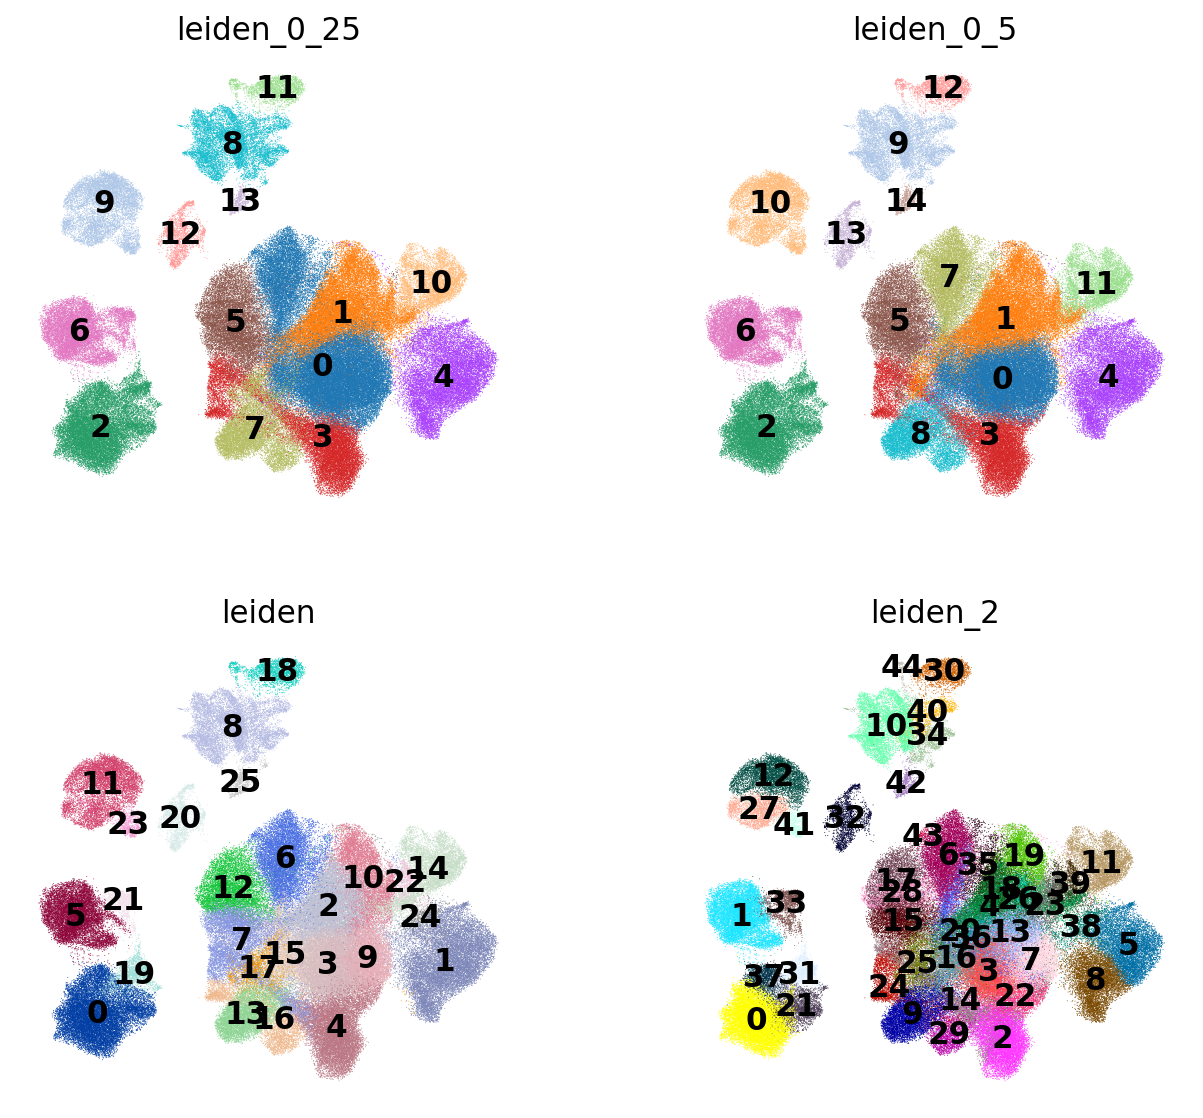

In [9]:
## 8.4.2 莱顿聚类可视化
sc.pl.umap(
    adata,
    color=["leiden_0_25", "leiden_0_5", "leiden", "leiden_2"],
    legend_loc="on data",
    ncols=2,
    wspace=0.2,
    save="-8.4.2.pdf",
)

In [10]:
sc.tl.leiden(adata, key_added="leiden_00_25", resolution=0.025)
sc.tl.leiden(adata, key_added="leiden_00_5", resolution=0.05)

running Leiden clustering
    finished: found 5 clusters and added
    'leiden_00_25', the cluster labels (adata.obs, categorical) (0:00:15)
running Leiden clustering
    finished: found 5 clusters and added
    'leiden_00_5', the cluster labels (adata.obs, categorical) (0:00:15)


/home/fanxi/miniconda3/envs/lang/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/fanxi/miniconda3/envs/lang/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


/home/fanxi/miniconda3/envs/lang/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


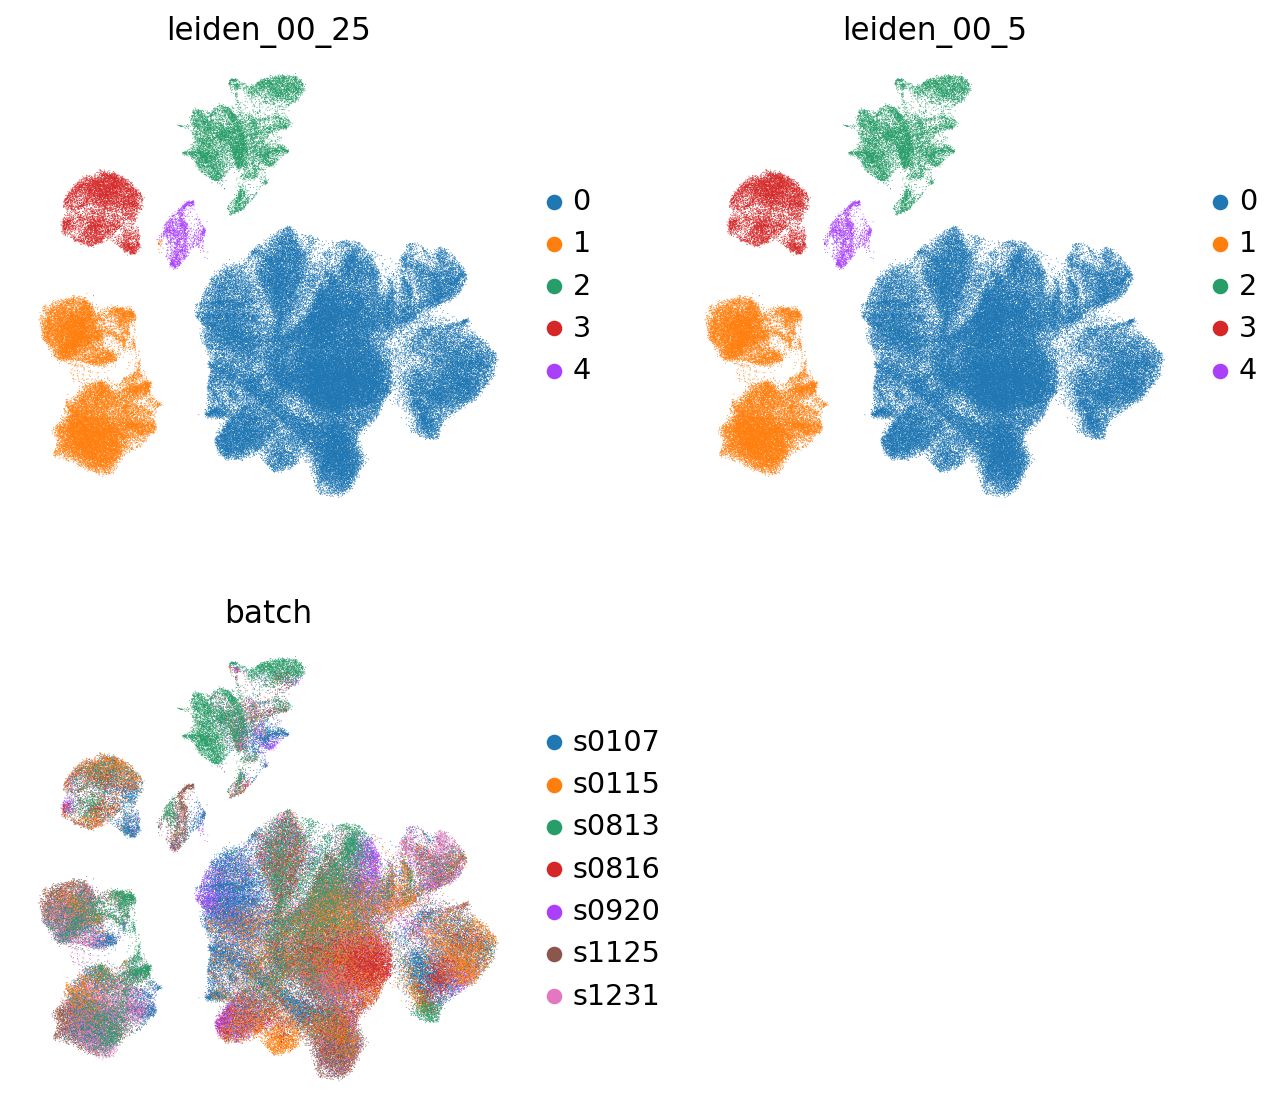

In [11]:
sc.pl.umap(
    adata,
    color=["leiden_00_25", "leiden_00_5"]+["batch"],
    # legend_loc="on data",
    ncols=2,
    wspace=0.2,
    save="-8.4.2-smalller.pdf",
)

/home/fanxi/miniconda3/envs/lang/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/fanxi/miniconda3/envs/lang/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


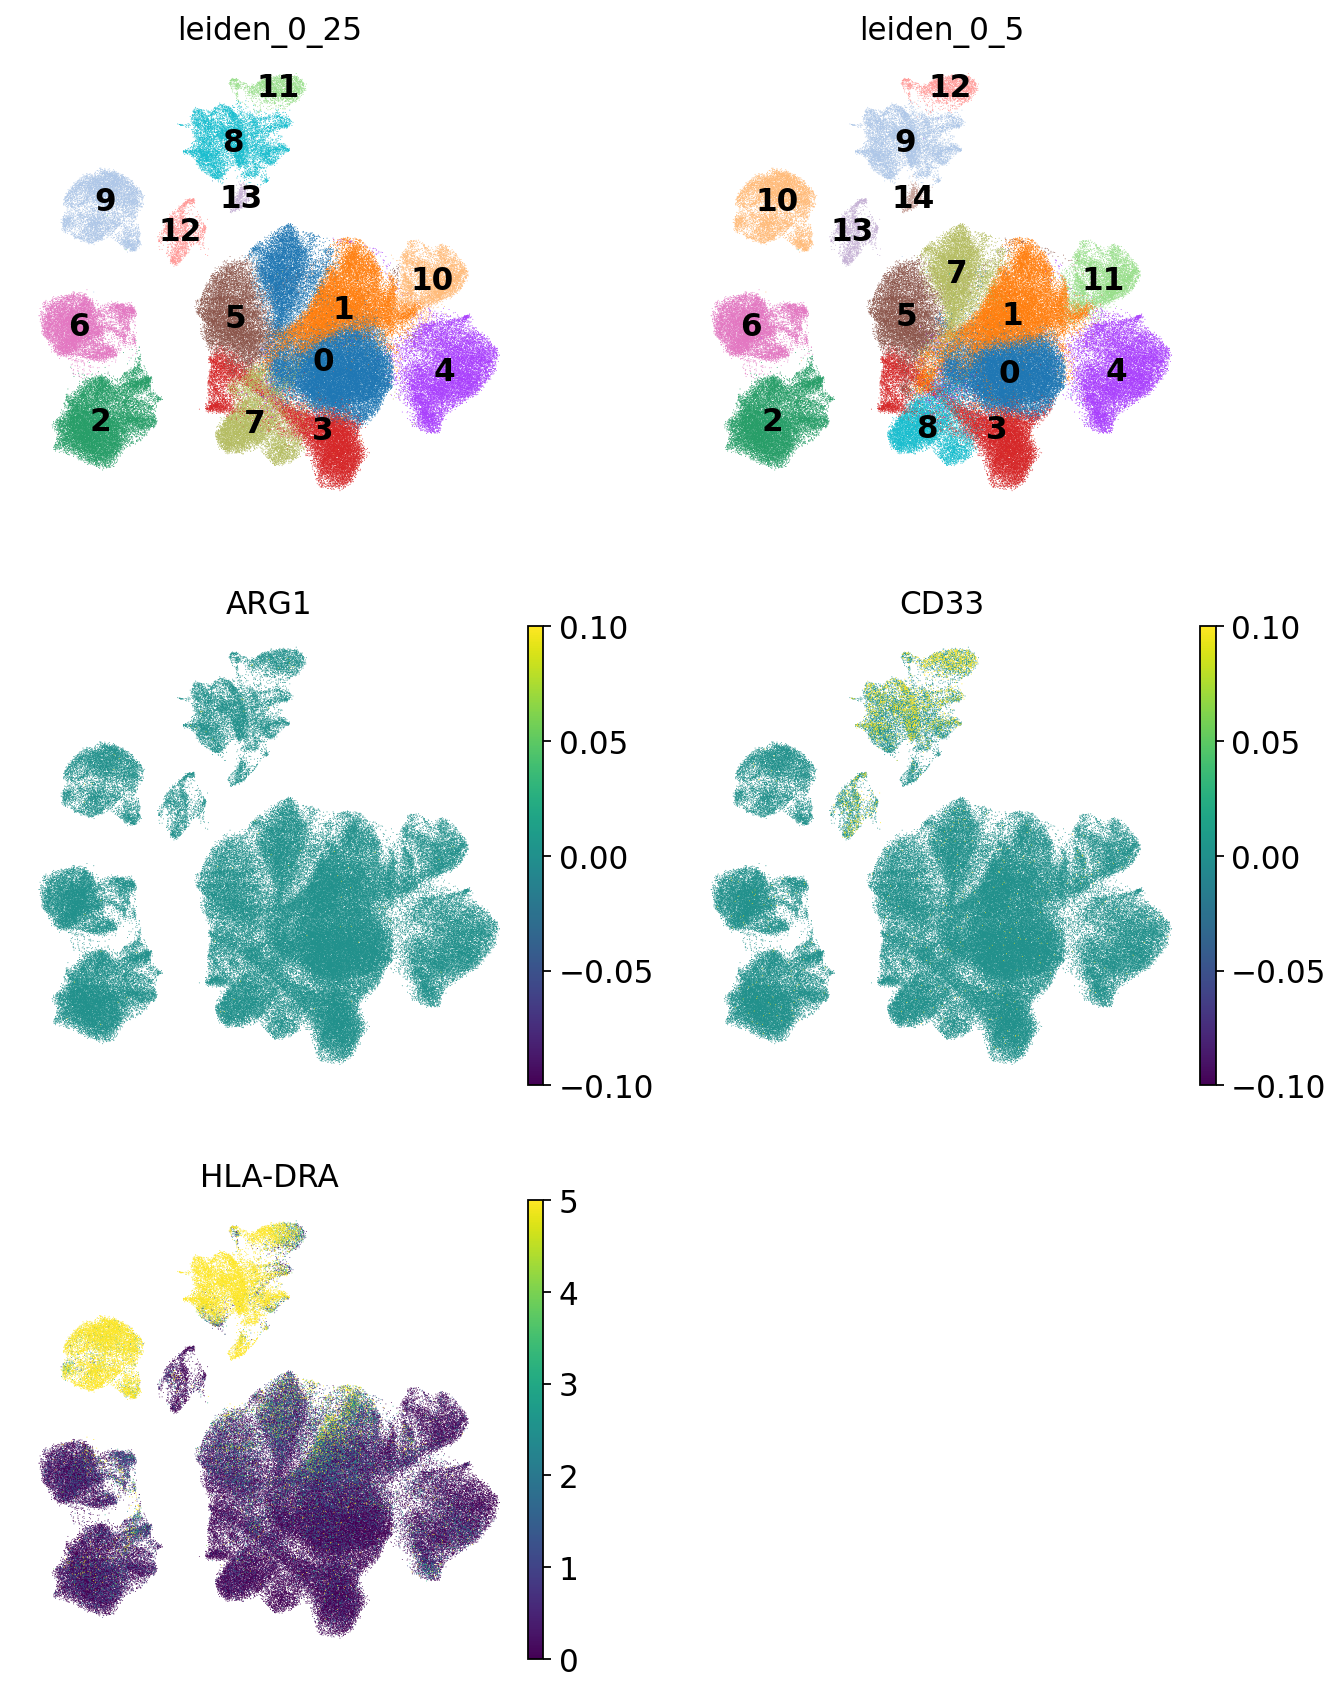

In [12]:
## 8.4.3 选择想要的分辨率，刚好注释到想要的细胞类型？
"""探索性选择分辨率,比如我刚好要注释出某个独立的亚群"""
sc.pl.umap(
    adata,
    color=["leiden_0_25", "leiden_0_5", "ARG1", "CD33", "HLA-DRA"], # 人类
    # color=["leiden_0_25", "leiden_0_5", "Ly6c1", "Ly6c2"],  # 小鼠
    # color = ["leiden_0_25", "leiden_0_5"]+["ident"],  # 大鼠
    legend_loc="on data",
    use_raw=True,  # 默认True就用的是adata.raw.X绘制
    ncols=2,
    save="-用示例基因比较颗粒度-8.4.3.pdf",
    vmax="p90",  # 分位数防止极端值影响
    vmin="p10",
)  #

In [13]:
## 8.4.4 page（可选）
## 断开连接的集群可用paga修复
# sc.tl.leiden(adata_batch,random_state=123) # paga需要先用leiden聚类,或者指定标签groups
# sc.tl.paga(adata_batch)
# sc.pl.paga(adata_batch, plot=True)  # plot coarse-grained graph
# sc.tl.umap(adata_batch, init_pos="paga")

# sc.pl.umap(
#     adata_batch,
#     color=["leiden","condition","sample"],
#     legend_loc="on data",
# )

In [14]:
## 8.5 保存
adata.write("anndata_cluster.h5ad", compression="gzip")  # type: ignore